In [ ]:
# pip install torch transformers

In [ ]:
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

def translate_sentence(model_name_or_path, sentence):
    # 加载预训练的模型和tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name_or_path)

    # 对输入句子进行编码
    inputs = tokenizer(sentence, return_tensors="pt")

    # 确保模型在正确的设备上运行，比如GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    model.to(device)

    # 生成翻译
    with torch.no_grad():
        generated_ids = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=128,  # 设置输出的最大长度
            num_beams=4,     # 设置beam search的数量
            early_stopping=True
        )

    # 解码翻译
    translation = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

    return translation

# 使用方法示例
model_name_or_path = 'your_model_directory_or_name'
sentence = 'Your sentence to translate goes here.'
translated_sentence = translate_sentence(model_name_or_path, sentence)
print(f'Translated Sentence: {translated_sentence}')

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# 需要下载nltk的数据包，只运行一次即可
nltk.download('omw-1.4')
nltk.download('wordnet')

# 参考译文列表，可以有多个参考译文
reference = [['the', 'cat', 'is', 'on', 'the', 'mat'], ['there', 'is', 'a', 'cat', 'on', 'the', 'mat']]

# 机器翻译的输出
candidate = ['the', 'cat', 'is', 'on', 'the', 'mat']

# 计算BLEU分数
# n_gram值可以设置为1, 2, 3, 4来分别计算1-gram到4-gram的BLEU分数
# 这里我们使用4-gram
bleu_score = sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25))

print("BLEU Score: ", bleu_score)

# 使用平滑处理，解决分母为零的情况
smoothie = SmoothingFunction().method1
bleu_score_smoothed = sentence_bleu(reference, candidate, smoothing_function=smoothie)
print("Smoothed BLEU Score: ", bleu_score_smoothed)

            翻译模型  BLEU分数
0      WordPiece    0.75
1  SentencePiece    0.82
2           VOLT    0.85


D:\Program Files\AI\Program Files\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32763 (\N{CJK UNIFIED IDEOGRAPH-7FFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Program Files\AI\Program Files\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35793 (\N{CJK UNIFIED IDEOGRAPH-8BD1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Program Files\AI\Program Files\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Program Files\AI\Program Files\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Program Files\AI\Program Files\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from c

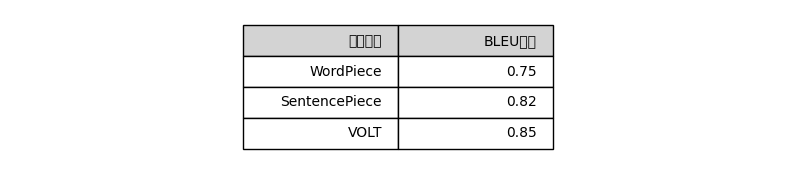

In [2]:
import pandas as pd

data = {
    '翻译模型': ['WordPiece', 'SentencePiece', 'VOLT'],
    'BLEU分数': [0.75, 0.82, 0.85]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 显示表格
print(df)

# 如果需要将表格保存为CSV文件，可以使用以下代码：
# df.to_csv('bleu_scores.csv', index=False)

# 若要使用matplotlib或seaborn绘图库绘制表格，可以使用如下代码：
import matplotlib.pyplot as plt
from matplotlib.table import Table

fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')

# 创建表格
table = Table(ax, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)

# 添加表格头
table.add_cell(0, 0, width=0.2, height=0.1, text='翻译模型', facecolor='lightgrey')
table.add_cell(0, 1, width=0.2, height=0.1, text='BLEU分数', facecolor='lightgrey')

# 添加数据行
for i, row in enumerate(data['翻译模型']):
    table.add_cell(i+1, 0, width=0.2, height=0.1, text=row)
    table.add_cell(i+1, 1, width=0.2, height=0.1, text=str(data['BLEU分数'][i]))

# 设置表格属性
table.scale(1, 2)
ax.add_table(table)

plt.show()